# Implementando a amplificação dos sinais que cehgam em uma determinada direção

In [15]:
import sys
sys.path.append('../Python')

import matplotlib.pyplot as plt
import numpy as np
import warnings
from DOACentroides2 import DOACentroides
from scipy.io.wavfile import read
from IPython.display import Audio

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 3]}
plt.rcParams.update(params)
warnings.filterwarnings("ignore")

### Importando os sinais dos microfones da gravação

Nessa gravação, eu falei na posição 2 (mic2) e o Matheus falou na posição 4 (mic3). A ideia é amplificar os sinais de ambas as posições separadamente para ouvir só a mim ou só ao Matheus.

In [3]:
sinalMic1 = read('../Gravacoes/Gravacao4/mic-01.wav')[1]
sinalMic2 = read('../Gravacoes/Gravacao4/mic-02.wav')[1]
sinalMic3 = read('../Gravacoes/Gravacao4/mic-03.wav')[1]
sinalMic4 = read('../Gravacoes/Gravacao4/mic-04.wav')[1]

freqAmostragem = read('../Gravacoes/Gravacao4/mic-04.wav')[0]

In [4]:
print("Tipo:\t\t", type(sinalMic1))
print("Tamanho:\t", len(sinalMic1))
print("Freq Amostragem:", freqAmostragem)

Tipo:		 <class 'numpy.ndarray'>
Tamanho:	 470016
Freq Amostragem: 44100


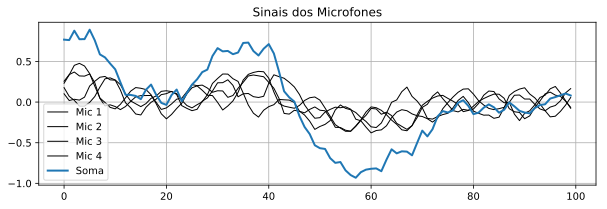

In [5]:
inicio  = 10000
tamanho = 100

sinalTotal = sinalMic1 + sinalMic2 + sinalMic3 + sinalMic4

plt.title("Sinais dos Microfones")
plt.plot(sinalMic1[inicio:inicio+tamanho], linewidth= 1, color="#000000", label="Mic 1")
plt.plot(sinalMic2[inicio:inicio+tamanho], linewidth= 1, color="#000000", label="Mic 2")
plt.plot(sinalMic3[inicio:inicio+tamanho], linewidth= 1, color="#000000", label="Mic 3")
plt.plot(sinalMic4[inicio:inicio+tamanho], linewidth= 1, color="#000000", label="Mic 4")
plt.plot(sinalTotal[inicio:inicio+tamanho], linewidth= 2, label="Soma")
plt.legend()
plt.grid()
plt.show()

### Usando os centróides para ajustar os sinais

In [6]:
objDOA = DOACentroides(sinalMic1, sinalMic2, sinalMic3, sinalMic4)

In [7]:
c = 2

print("Qtd de centróides:\t", len(objDOA.centroides))
print("Centróide da direção 2:\t", objDOA.centroides[2])

delay12 = int(round(objDOA.centroides[c][0]))
delay13 = int(round(objDOA.centroides[c][1]))
delay14 = int(round(objDOA.centroides[c][2]))

print("Delay entre 1 e 2:\t", delay12)
print("Delay entre 1 e 3:\t", delay13)
print("Delay entre 1 e 4:\t", delay14)

Qtd de centróides:	 8
Centróide da direção 2:	 [-5.31498935  0.          5.31498935  5.31498935 10.62997869  5.31498935]
Delay entre 1 e 2:	 -5
Delay entre 1 e 3:	 0
Delay entre 1 e 4:	 5


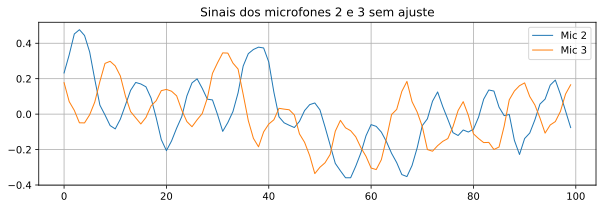

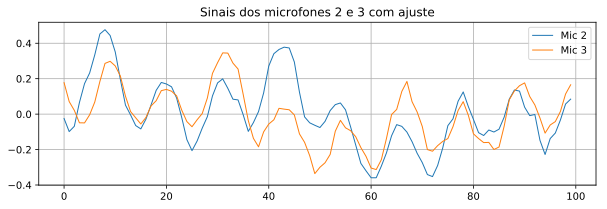

In [14]:
inicio  = 10000
tamanho = 100

plt.title("Sinais dos microfones 2 e 3 sem ajuste")
plt.plot(sinalMic2[inicio:inicio+tamanho], linewidth= 1, label="Mic 2")
plt.plot(sinalMic3[inicio:inicio+tamanho], linewidth= 1, label="Mic 3")
plt.legend()
plt.grid()
plt.show()

inicioMic2 = inicio + delay12
inicioMic3 = inicio + delay13

plt.title("Sinais dos microfones 2 e 3 com ajuste")
plt.plot(sinalMic2[inicioMic2:inicioMic2+tamanho], linewidth= 1, label="Mic 2")
plt.plot(sinalMic3[inicioMic3:inicioMic3+tamanho], linewidth= 1, label="Mic 3")
plt.legend()
plt.grid()
plt.show()

### Função para amplificar uma determinada posição

In [9]:
def amplificarDirecao(posicao, sinalMic1, sinalMic2, sinalMic3, sinalMic4, centroides, maxDelay):
    
    # O delay entre os microfones está contido no array de centroides
    delay12 = int(round(centroides[posicao][0]))
    delay13 = int(round(centroides[posicao][1]))
    delay14 = int(round(centroides[posicao][2]))

    # O microfone 1 será fixo e os outros se ajustarão perante a ele
    inicioMic1 = maxDelay
    inicioMic2 = inicioMic1 + delay12
    inicioMic3 = inicioMic1 + delay13
    inicioMic4 = inicioMic1 + delay14

    # O array vai ser cortado no começo e no fim pelo tamanho do delay máximo possível
    tamanho = len(sinalMic1) - 2 * maxDelay

    # Criando os novos sinais
    novoSinal1 = sinalMic1[inicioMic1:inicioMic1+tamanho] 
    novoSinal2 = sinalMic2[inicioMic2:inicioMic2+tamanho] 
    novoSinal3 = sinalMic3[inicioMic3:inicioMic3+tamanho] 
    novoSinal4 = sinalMic4[inicioMic4:inicioMic4+tamanho] 

    # Somando para criar um sinal único
    audioAmplificado = novoSinal1 + novoSinal2 + novoSinal3 + novoSinal4
    return audioAmplificado

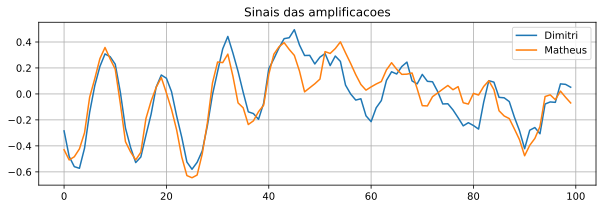

In [10]:
sinalTotal = sinalMic1 + sinalMic2 + sinalMic3 + sinalMic4
amplificacaoDimitri = amplificarDirecao(2, sinalMic1, sinalMic2, sinalMic3, sinalMic4, objDOA.centroides, objDOA.maxDelay)
amplificacaoMatheus = amplificarDirecao(4, sinalMic1, sinalMic2, sinalMic3, sinalMic4, objDOA.centroides, objDOA.maxDelay)

inicio  = 30000
tamanho = 100

plt.title("Sinais das amplificacoes")
plt.plot(amplificacaoDimitri[inicio:inicio+tamanho], label="Dimitri")
plt.plot(amplificacaoMatheus[inicio:inicio+tamanho], label="Matheus")
plt.legend()
plt.grid()
plt.show()

## Resultados

#### Sinal "puro"

In [11]:
Audio(data=sinalTotal, rate=freqAmostragem)

#### Amplificando a posição 2

In [12]:
Audio(data=amplificacaoDimitri, rate=freqAmostragem)

#### Amplificando a posição 4

In [13]:
Audio(data=amplificacaoMatheus, rate=freqAmostragem)